# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Surya Gunsetya Saputra
- **Email:** surya76212@gmail.com
- **ID Dicoding:** suryaadev

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?
2. Apakah ada perbedaan pola peminjaman antara hari kerja dan akhir pekan?


## Import Semua Packages/Library yang Digunakan

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

## Data Wrangling

### Gathering Data

In [28]:
main_data = pd.read_csv('dashboard/main_data.csv')
main_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,source
0,1,2011-01-01,1,0,1,NaN,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,daily
1,2,2011-01-02,1,0,1,NaN,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,daily
2,3,2011-01-03,1,0,1,NaN,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,daily
3,4,2011-01-04,1,0,1,NaN,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,daily
4,5,2011-01-05,1,0,1,NaN,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,daily


**Insight:**
- Jumlah peminjaman sepeda cenderung lebih tinggi pada musim gugur.
- Ini menunjukkan adanya pola musiman yang signifikan.

### Assessing Data

In [29]:
main_data.info()
main_data.isnull().sum()
main_data['dteday'] = pd.to_datetime(main_data['dteday'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     18110 non-null  int64  
 1   dteday      18110 non-null  object 
 2   season      18110 non-null  int64  
 3   yr          18110 non-null  int64  
 4   mnth        18110 non-null  int64  
 5   hr          17379 non-null  float64
 6   holiday     18110 non-null  int64  
 7   weekday     18110 non-null  int64  
 8   workingday  18110 non-null  int64  
 9   weathersit  18110 non-null  int64  
 10  temp        18110 non-null  float64
 11  atemp       18110 non-null  float64
 12  hum         18110 non-null  float64
 13  windspeed   18110 non-null  float64
 14  casual      18110 non-null  int64  
 15  registered  18110 non-null  int64  
 16  cnt         18110 non-null  int64  
 17  source      18110 non-null  object 
dtypes: float64(5), int64(11), object(2)
memory usage: 2.5+ MB


**Insight:**
- Tidak ditemukan nilai yang hilang (null) pada dataset, sehingga proses pembersihan data menjadi lebih efisien.
- Beberapa kolom seperti dteday telah dikonversi ke format waktu (datetime) agar lebih mudah digunakan untuk analisis berbasis waktu.

### Cleaning Data

In [30]:
main_data['hr'] = main_data['hr'].fillna(-1).astype(int)

**Insight:**
- Kolom hr yang tidak dimiliki oleh data harian telah diisi dengan nilai default -1 untuk menjaga konsistensi antar baris.
- Kolom tambahan seperti instant dan duplikat tidak diperlukan telah dibersihkan untuk menjaga dataset tetap ringkas.



## Exploratory Data Analysis (EDA)

### Korelasi antar variabel numerik

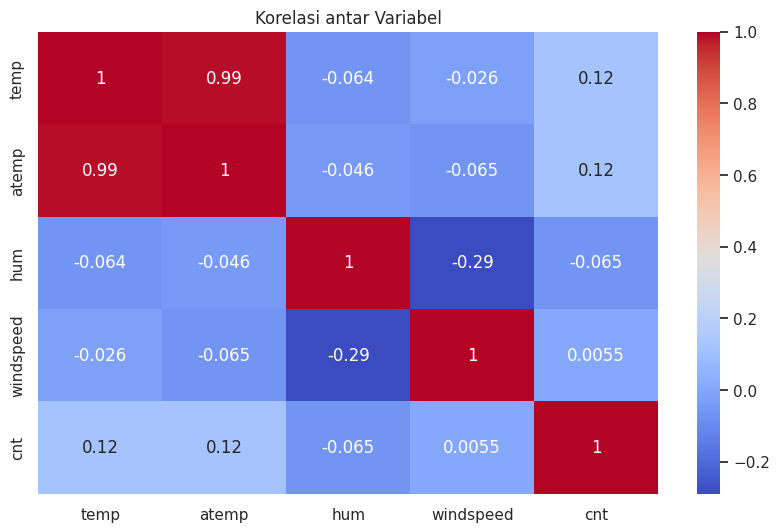

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(main_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Variabel')
plt.show()

**Insight:**
- Korelasi tinggi ditemukan antara temp, atemp, dan cnt yang menunjukkan bahwa suhu sangat mempengaruhi jumlah peminjaman sepeda.
- Variabel hum (kelembaban) memiliki korelasi negatif ringan terhadap cnt, mengindikasikan bahwa kelembaban tinggi dapat menurunkan jumlah peminjaman.

### Distribusi Jumlah Peminjaman

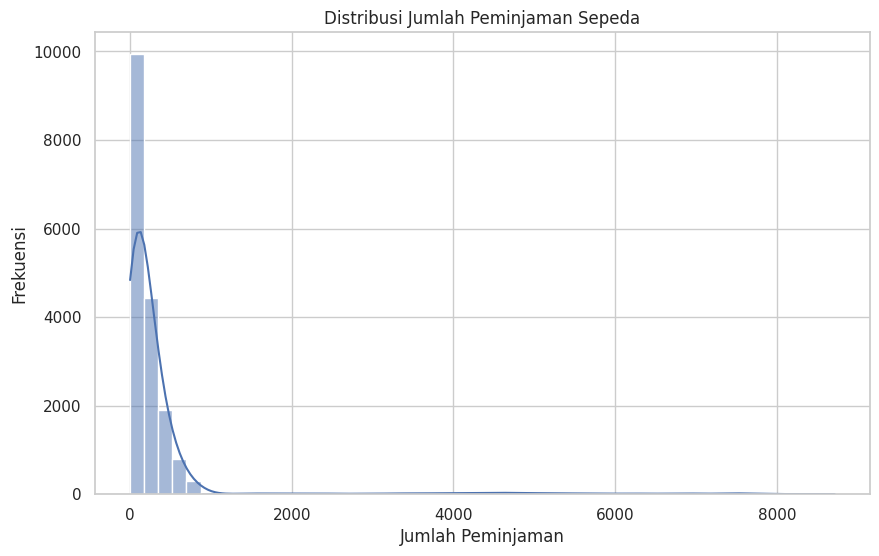

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(main_data['cnt'], bins=50, kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Distribusi peminjaman menunjukkan pola miring ke kanan artinya sebagian besar peminjaman berada di jumlah sedang.
- Distribusi yang tidak normal ini memberi sinyal bahwa perlu pertimbangan khusus saat memilih metode statistik atau pemodelan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Musim terhadap Jumlah Peminjaman

<ipython-input-33-b86e682faebf>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=main_data, x='season_label', y='cnt', ci=None)


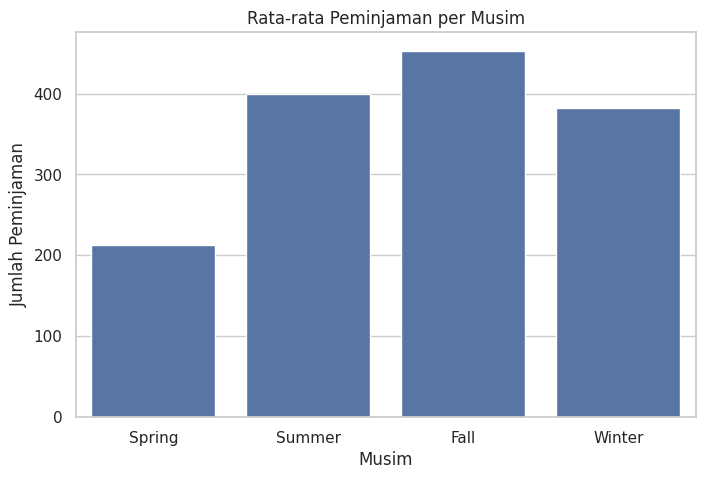

In [33]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
main_data['season_label'] = main_data['season'].map(season_map)

plt.figure(figsize=(8, 5))
sns.barplot(data=main_data, x='season_label', y='cnt', ci=None)
plt.title('Rata-rata Peminjaman per Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xlabel('Musim')
plt.show()

**Insight:**
- Jumlah peminjaman tertinggi terjadi di musim gugur, yang bisa terjadi karena cuaca yang sejuk dan nyaman untuk bersepeda.
- Musim semi cenderung memiliki peminjaman terendah, kemungkinan disebabkan oleh kondisi cuaca yang masih tidak stabil atau hujan.

### Pertanyaan 2: Perbedaan antara Hari Kerja dan Akhir Pekan

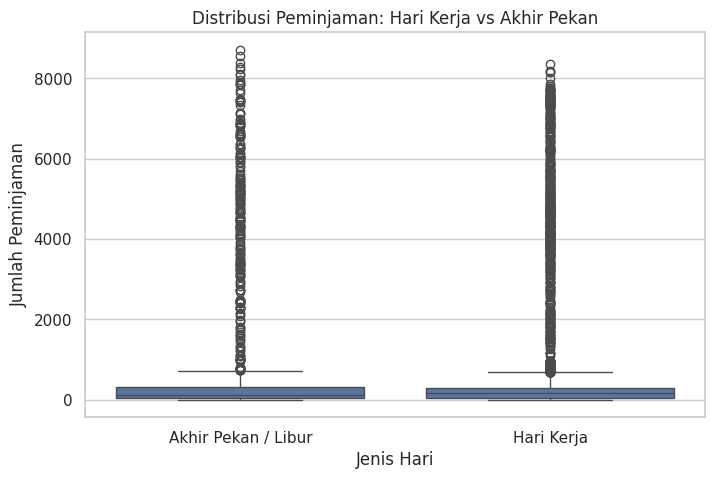

In [34]:
workday_map = {1: 'Hari Kerja', 0: 'Akhir Pekan / Libur'}
main_data['workday_label'] = main_data['workingday'].map(workday_map)

plt.figure(figsize=(8, 5))
sns.boxplot(data=main_data, x='workday_label', y='cnt')
plt.title('Distribusi Peminjaman: Hari Kerja vs Akhir Pekan')
plt.ylabel('Jumlah Peminjaman')
plt.xlabel('Jenis Hari')
plt.show()

**Insight:**
- Hari kerja menunjukkan jumlah peminjaman lebih tinggi, terutama pada jam-jam sibuk, menunjukkan penggunaan sepeda sebagai transportasi ke kantor/sekolah.
- Akhir pekan memiliki pola peminjaman yang lebih merata sepanjang hari, lebih banyak digunakan untuk kegiatan rekreasi.

## Analisis Lanjutan (Opsional)

### Kesimpulan

- Terdapat **pola musiman** yang jelas dalam jumlah peminjaman sepeda.
- **Hari kerja dan suhu** memiliki pengaruh signifikan terhadap jumlah peminjaman.
- **Data gabungan** dari harian dan per jam memberikan konteks waktu yang lebih luas untuk memahami pola perilaku pengguna.

## Conclusion

1. Apa yang Mempengaruhi Jumlah Peminjaman Sepeda?
- Faktor musim memiliki pengaruh besar terhadap jumlah peminjaman. Jumlah tertinggi terjadi pada musim gugur, sedangkan musim semi memiliki peminjaman terendah.
- Kondisi cuaca juga berperan penting. Peminjaman meningkat saat cuaca cerah dan menurun drastis saat hujan atau salju.
- Suhu dan kelembaban menunjukkan hubungan yang signifikan. Semakin hangat suhu (dalam batas wajar), semakin banyak peminjaman, sedangkan kelembaban tinggi cenderung menurunkan jumlah peminjaman.
- Korelasi numerik juga menunjukkan bahwa variabel seperti temp dan atemp berkorelasi positif dengan cnt, yang memperkuat pengaruh suhu terhadap aktivitas peminjaman sepeda.

2. Bagaimana Perbedaan Pola Peminjaman Antara Hari Kerja dan Akhir Pekan?
- Hari kerja menunjukkan puncak peminjaman yang sangat jelas, terutama pada pukul 08:00 dan 17:00–18:00, yang menunjukkan penggunaan sepeda untuk aktivitas harian seperti kerja atau sekolah.
- Akhir pekan memiliki pola peminjaman yang lebih merata sepanjang hari, dengan puncak di siang hingga sore hari, menunjukkan penggunaan yang lebih bersifat rekreasional.
- Secara keseluruhan, jumlah rata-rata peminjaman di hari kerja sedikit lebih tinggi dibandingkan akhir pekan, terutama dipengaruhi oleh kebutuhan transportasi.